# Tutorial 2: Trends

In this tutorial we will learn how to use the `Trend` component to model the trends of a time series.

We start with the same setup from the previous tutorial in terms of importing the necessary libraries and loading the data.

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

NeuralProphet has by default the `Trend` and the `Seasonality` components enabled. In this second tutorial we will explore the `Trend` component in more detail and start with its most basic configuration. Therefore we will disable the `Seasonality` component for now and set the number of `Trend` changepoints to `0` (zero).

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

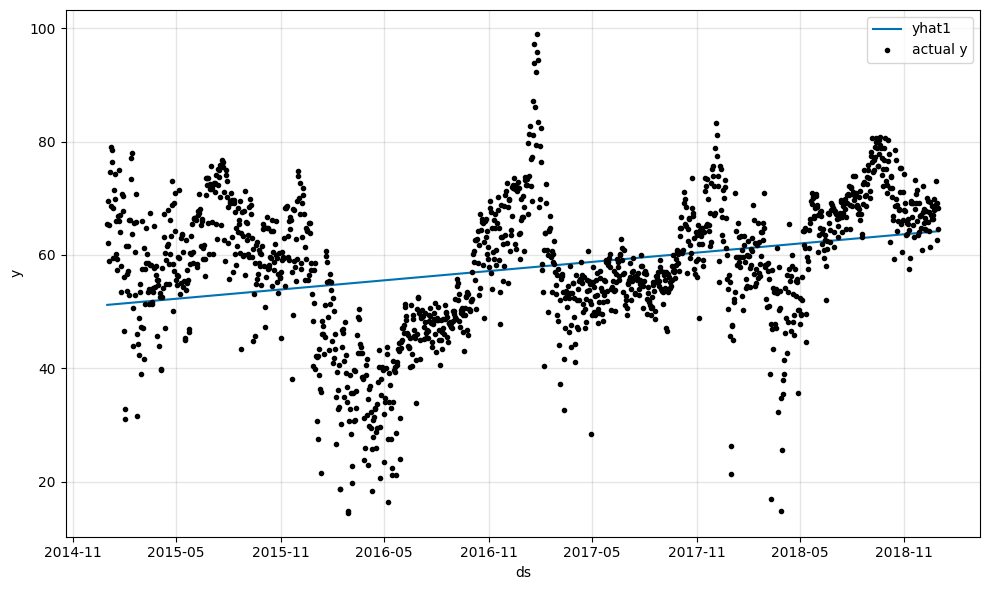

In [2]:
# Model and prediction
m = NeuralProphet(
    # Disable change trendpoints
    n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

We already see a linear trend line in the plot which fits well to the data.

Let us explore which trends could be seen in our dataset and how our model automatically fitted to those trends. Later we look into how to fine tune the model trend parameters.

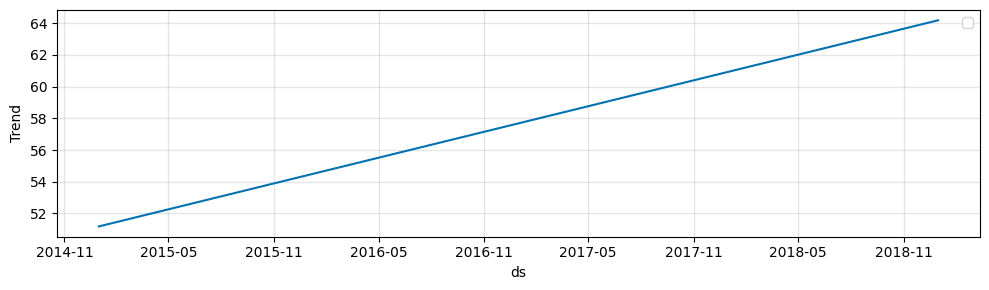

In [3]:
fig = m.plot_components(forecast, components=["trend"])

NeuralProphet uses a classic approach to model the trend as the combination of an offset $m$ and a growth rate $k$. The trend effect at a time $t1$ is given by multiplying the growth rate $k$ by the difference ($t1 - t0$) in time since the starting point $t0$ on top of the offset $m$.

$$\text{trend}(t1) = m + k \cdot (t1 - t0) = \text{trend}(t0) + k \cdot (t1 - t0)$$


After learning about the theory of the trend, we use the model to predict the tend into the future and see how our trend line will continue.

Predicting: 46it [00:00, ?it/s]

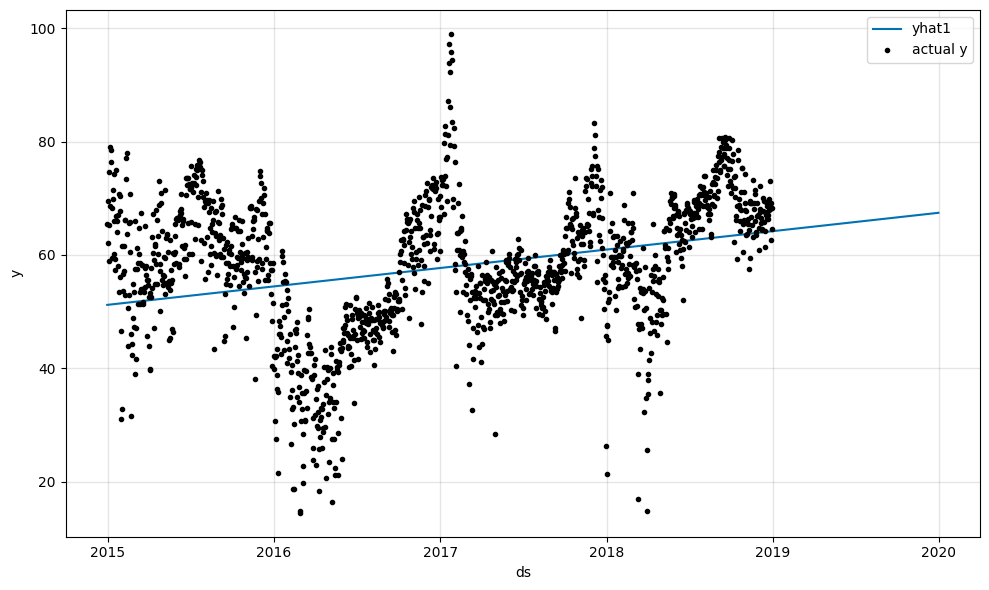

In [4]:
df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
fig = m.plot(forecast)

The linear trend line does continue in the future. Overall there is a slight upward trend in the data.

After learning the basics of the trend in NeuralProphet, let's look into the trend changepoints we disabled earlier. Trend changepoints are points in time where the trend changes. NeuralProphet automatically detects these changepoints and fits a new trend line to the data before and after the changepoint. Let's see how many changepoints NeuralProphet detected.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

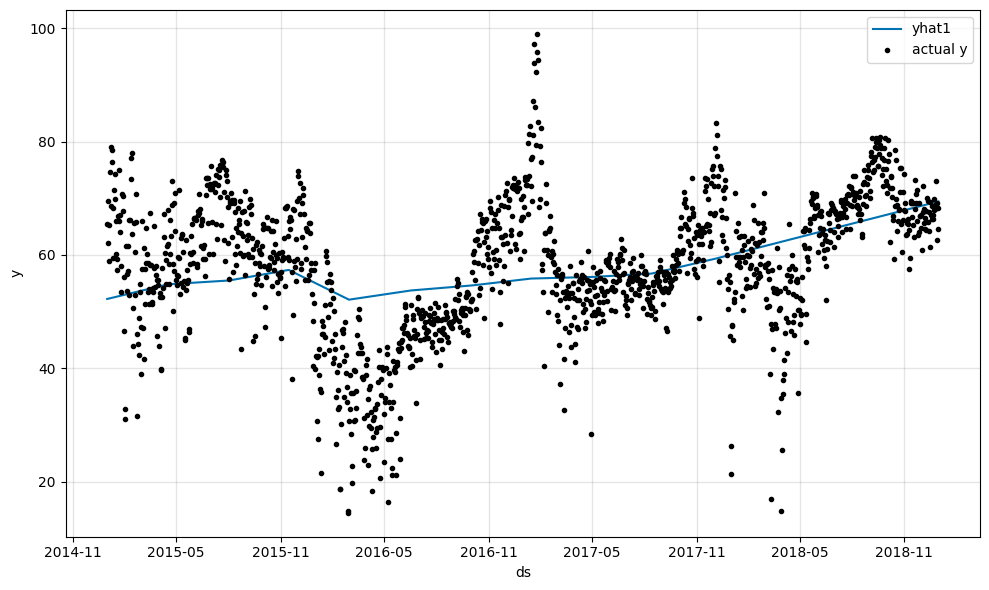

In [5]:
# Model and prediction
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    # n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

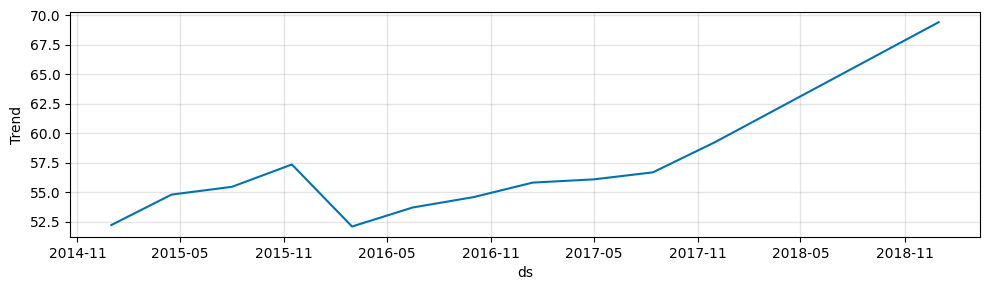

In [6]:
fig = m.plot_parameters(components=["trend"])

Now the trendline does fit the data way better. We can see that NeuralProphet used the default parameter of 10 changepoints and fit them to our data.